In [1]:
from CeyerLibrary import generateDict
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

monthDict = generateDict()  #Set up the dictionary
meV_to_cm = 8.065

In [2]:
# Input file name and location
mainpath = '/Users/qingliu/Dropbox (MIT)/littlemachine/'
filename = 'jul03_17.e04'
# spike_removal = True
spike_removal = False
ymax_for_plot = 30

In [3]:
# Load Data
filepath = mainpath + '20' + filename[6:8] + '/' + monthDict[filename[:3]] + '_' + filename[:3] + '/' + filename
f = open(filepath, 'r')
data = f.readlines()
f.close()
df = pd.read_csv(filepath, comment='X')

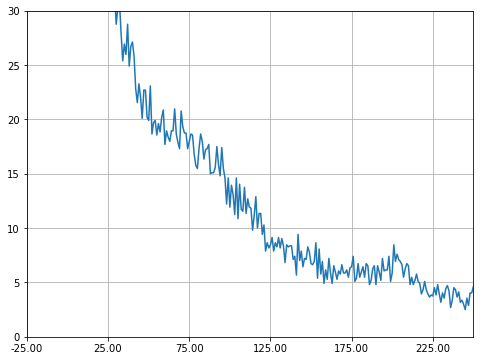

In [4]:
finish_flag = False
if data[0].split()[0] == 'IGOR':
    print(filename, 'already processed!')
    finish_flag = True
else:
    df.iloc[-1].plot(ylim=(0, ymax_for_plot), grid=True, figsize=(8, 6))

In [5]:
def get_counts_n_voltage(df, spike_removal):
    if spike_removal == True:
        threshold = df.max() > 30 * df.mean()
        print(sum(threshold), 'spikes found at the following locations:')
        spike_location = df.idxmax()[threshold]
        for energy, row in spike_location.iteritems():
            print(energy)
            df.loc[row][energy] = 0
        df.iloc[-1] = df.iloc[:-1].mean()
    voltage = meV_to_cm * df.columns.values.astype('float')
    counts = df.iloc[-1].values
    return counts, voltage

In [6]:
# Process Data
if finish_flag == False:
    file = open(filepath,'w')
    file.write('IGOR\nWaves Counts, Voltage\nBegin\n')
    counts, voltage = get_counts_n_voltage(df, spike_removal)
    for c,v in zip(counts, voltage):
        file.write('{0:.3f}, {1:.3f}\n'.format(c, v))
    file.write('End\n')
    
    i = df.iloc[-1].name + 2
    while i < len(data):
        file.write(data[i])
        i += 1
    file.close()
    print(filename, 'Success!')

jul03_17.e04 Success!


In [7]:
# Plot after spike removal
if finish_flag == False and spike_removal == True: 
    df.iloc[-1].plot(ylim=(0, ymax_for_plot), grid=True, figsize=(8, 6))